# Performing Exploratory Data Analysis on Car Price Dataset

In [326]:

import pandas as pd # Used for Data Manipulation and analysis
import numpy as np # Fast mathematical operations on arrays and matrices. 
import matplotlib.pyplot as plt # A core library used to create or visual static plots and charts
import seaborn as sns # Helps visualise beautiful and informative statistical plots


from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest,f_regression

df = pd.read_csv('car_data_v2.csv') # Loading my dataset

#Target variable: selling_price


In [327]:
df

,car_name,brand,model,vehicle_age,km_driven,mileage,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,19.70,46.30,5,120000
1,Maruti Alto,Maruti,Alto,9,37000,20.92,67.10,5,226000
2,Maruti Wagon R,Maruti,Wagon R,8,35000,18.90,67.10,5,350000
3,Maruti Wagon R,Maruti,Wagon R,3,17512,20.51,67.04,5,410000
4,Hyundai Venue,Hyundai,Venue,2,20000,18.15,118.35,5,1050000
...,...,...,...,...,...,...,...,...,...
2114,Maruti Celerio,Maruti,Celerio,6,60000,23.10,67.04,5,385000
2115,Maruti Alto,Maruti,Alto,7,44000,30.46,47.30,5,275000
2116,Renault KWID,Renault,KWID,4,29847,24.04,67.00,5,485000
2117,Maruti Alto,Maruti,Alto,4,12706,24.70,47.30,5,313000


In [328]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,mileage,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,19.70,46.30,5,120000
1,Maruti Alto,Maruti,Alto,9,37000,20.92,67.10,5,226000
2,Maruti Wagon R,Maruti,Wagon R,8,35000,18.90,67.10,5,350000
3,Maruti Wagon R,Maruti,Wagon R,3,17512,20.51,67.04,5,410000
4,Hyundai Venue,Hyundai,Venue,2,20000,18.15,118.35,5,1050000


In [329]:
df.tail() #Gives the last five rows

,car_name,brand,model,vehicle_age,km_driven,mileage,max_power,seats,selling_price
2114,Maruti Celerio,Maruti,Celerio,6,60000,23.10,67.04,5,385000
2115,Maruti Alto,Maruti,Alto,7,44000,30.46,47.30,5,275000
2116,Renault KWID,Renault,KWID,4,29847,24.04,67.00,5,485000
2117,Maruti Alto,Maruti,Alto,4,12706,24.70,47.30,5,313000
2118,Renault KWID,Renault,KWID,2,2700,25.17,53.30,5,395000



To further understand the dataset we need to understand the structure of the dataset interms of shape, size, data type in the dataset, number of missing or present values and memory usage of the dataset.



In [330]:
df.shape # Checking the number of rows and columns in order to know how big or small is the dataset 

(2119, 9)

In [331]:
df.size #total number of elements in the data frame

19071

In [332]:
df.info() #gives a quick summary interms of number of rows and coloms, null count/missing values, dtype, and range index 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_name       2119 non-null   object 
 1   brand          2119 non-null   object 
 2   model          2119 non-null   object 
 3   vehicle_age    2119 non-null   int64  
 4   km_driven      2119 non-null   int64  
 5   mileage        2119 non-null   float64
 6   max_power      2119 non-null   float64
 7   seats          2119 non-null   int64  
 8   selling_price  2119 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 149.1+ KB


From the summary above we can deduce that the row indec starts from 0 to 2118 making 2119 rows in total with 9 columns

In [333]:
df.columns # Outputs all the colomns present on the dataset

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'mileage',
       'max_power', 'seats', 'selling_price'],
      dtype='object')

#From the Data summary above we have Object - datatype - 
Categorical data: car_name, brand and model.

In [334]:
#output different names of the car foound under car_name category

df['car_name'].unique()

array(['Maruti Alto', 'Maruti Wagon R', 'Hyundai Venue', 'Renault KWID',
       'Datsun RediGO', 'Maruti Celerio', 'Ford Ecosport',
       'Renault Triber', 'Maruti S-Presso', 'Volkswagen Polo',
       'Datsun redi-GO', 'Maruti Baleno', 'Volkswagen Vento'],
      dtype=object)

In [335]:
#Outputs different brand name found under brand category

df['brand'].unique()

array(['Maruti', 'Hyundai', 'Renault', 'Datsun', 'Ford', 'Volkswagen'],
      dtype=object)

In [336]:
#outputs different model names of the cars found under model category

df['model'].unique()

array(['Alto', 'Wagon R', 'Venue', 'KWID', 'RediGO', 'Celerio',
       'Ecosport', 'Triber', 'S-Presso', 'Polo', 'redi-GO', 'Baleno',
       'Vento'], dtype=object)

In [337]:
# checking the type of data and few elements of the specified column

df['selling_price'].head()  

0     120000
1     226000
2     350000
3     410000
4    1050000
Name: selling_price, dtype: int64

# Feature Engineering

#Handling of missing values on the dataset:

In [338]:
# checking for the null values in %

df.isnull().sum()/len(df)*100

car_name         0.0
brand            0.0
model            0.0
vehicle_age      0.0
km_driven        0.0
mileage          0.0
max_power        0.0
seats            0.0
selling_price    0.0
dtype: float64

From the output i can deduce that there is no null values on the dataset. 

However, if there was null values on the dataset I would impute them by:
1. Abitary constant
2. Central tendancies (mean, median & mode)
3. Backward fill & forward fill

Finally used df.fillna(value, axis = 1, inplace =True) to replace the null values with Constant or Central tendacies value

#Detecting Outliers:

<Axes: ylabel='selling_price'>

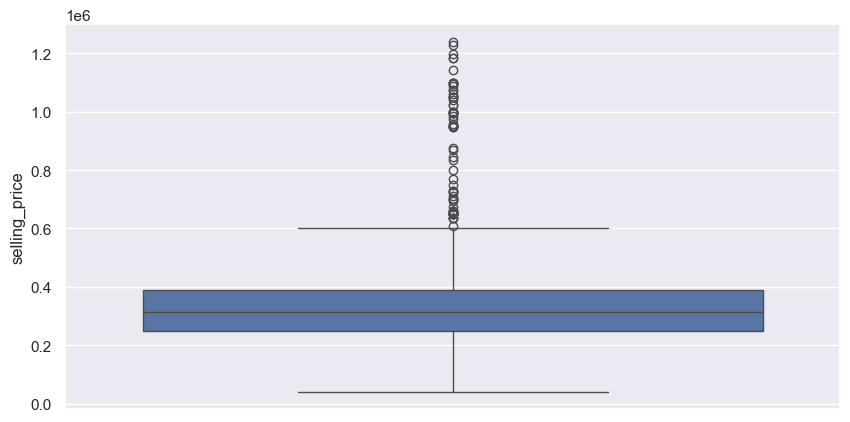

In [339]:
# detecting outliers on the selling price column

plt.figure(figsize=(10,5))
sns.set_theme(style ='darkgrid')
sns.boxplot(df['selling_price'])

=>From the above boxplot the Maximum is 0.6 and there is few data point beyond the maximum value thus i can conclude that there are outliers in the selling price column.


<Axes: xlabel='brand', ylabel='selling_price'>

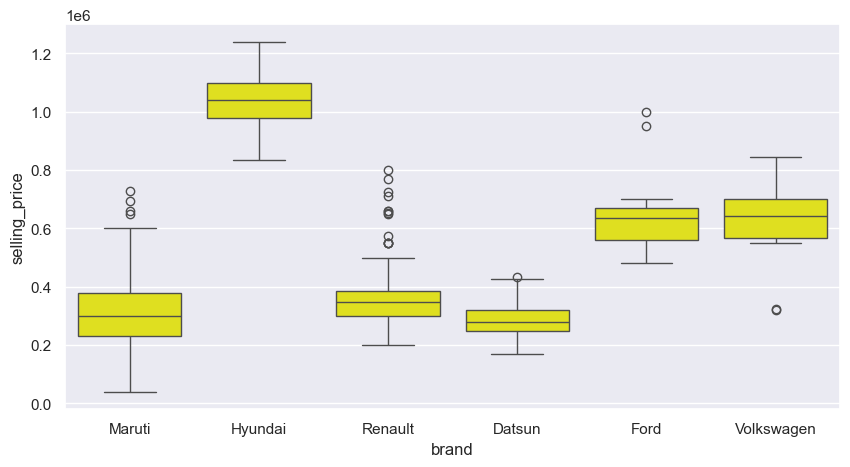

In [340]:
# detecting outliers on the selling price column

plt.figure(figsize=(10,5))
sns.set_theme(style ='darkgrid')
sns.boxplot(x ='brand', y='selling_price',data=df, color = 'yellow')

<Axes: xlabel='model', ylabel='selling_price'>

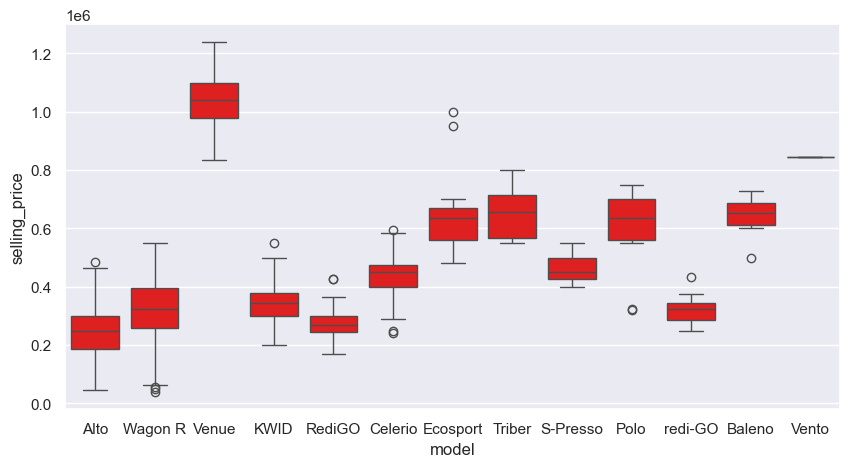

In [341]:
# detecting outliers on the selling price column against model

plt.figure(figsize=(10,5))
sns.set_theme(style ='darkgrid')
sns.boxplot(x ='model', y='selling_price',data=df, color = 'red')

<Axes: xlabel='car_name', ylabel='selling_price'>

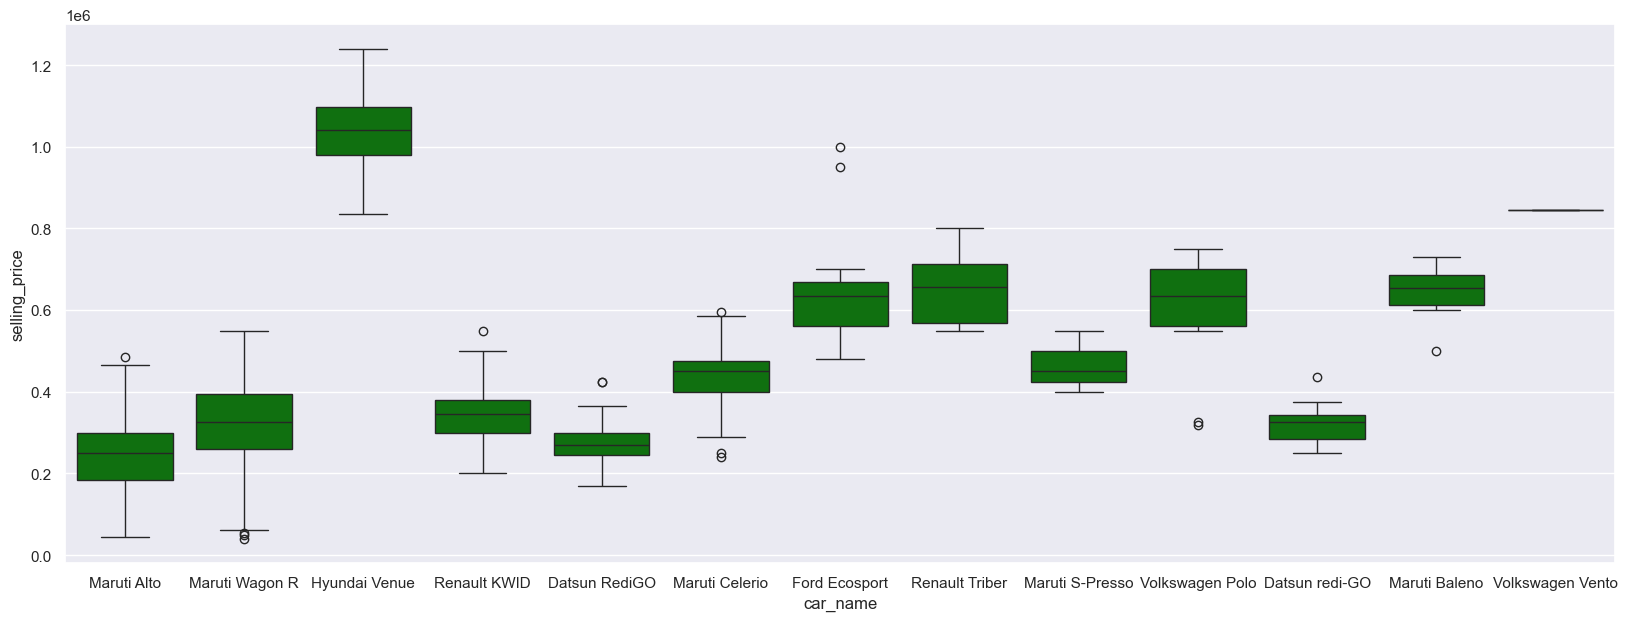

In [342]:
# detecting outliers on the selling price column

plt.figure(figsize=(20,7))
sns.set_theme(style ='darkgrid')
sns.boxplot(x ='car_name', y='selling_price',data=df, color = 'green')

<Axes: xlabel='selling_price', ylabel='Density'>

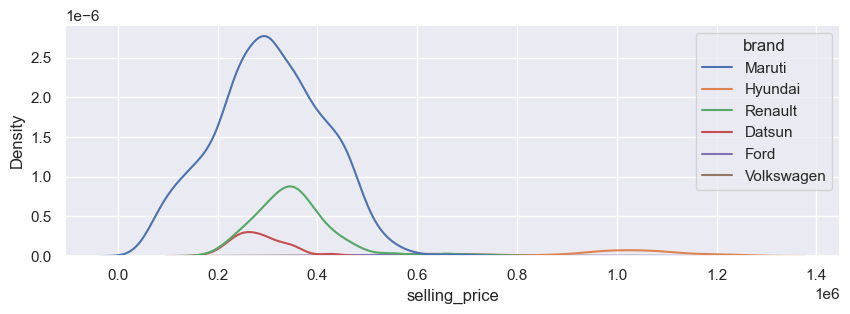

In [343]:
#kDe plot=displays outlier when hue is
plt.figure(figsize=(10,3))
sns.set_theme(style='darkgrid')
sns.kdeplot(x = df['selling_price'],hue=df['brand'])

In [344]:
def get_whiskers(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - 1.5
    lower_whisker = q1 - 1.5
    upper_whisker = q3 + 1.5
    return lower_whisker, upper_whisker

lw, uw = get_whiskers(df['selling_price'])


In [345]:
lw,uw

(248998.5, 390001.5)

In [346]:
index = np.where((df['selling_price'] > uw) | (df['selling_price'] < lw))


df.drop(index[0], inplace =True)

<Axes: ylabel='selling_price'>

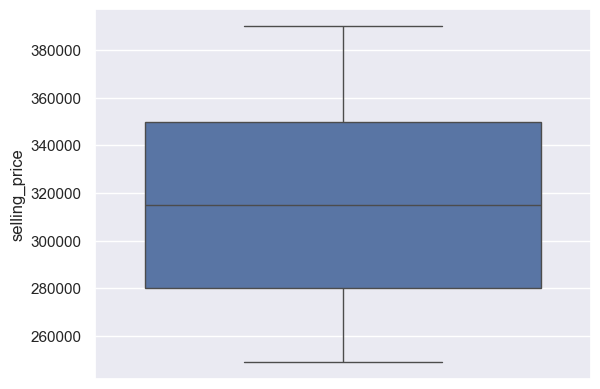

In [347]:
sns.boxplot(df['selling_price'])

In [348]:
df.shape

(1072, 9)

In [349]:
df['selling_price'].describe()

count      1072.000000
mean     315850.746269
std       40494.194111
min      249000.000000
25%      280000.000000
50%      315000.000000
75%      350000.000000
max      390000.000000
Name: selling_price, dtype: float64

<Axes: xlabel='selling_price', ylabel='Count'>

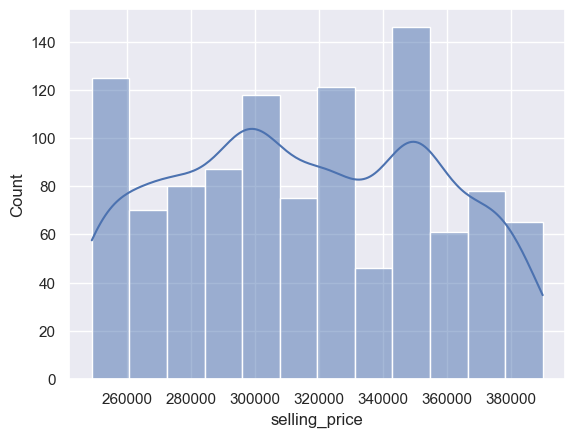

In [350]:
sns.histplot(df['selling_price'], kde = True)

<Axes: xlabel='selling_price', ylabel='Density'>

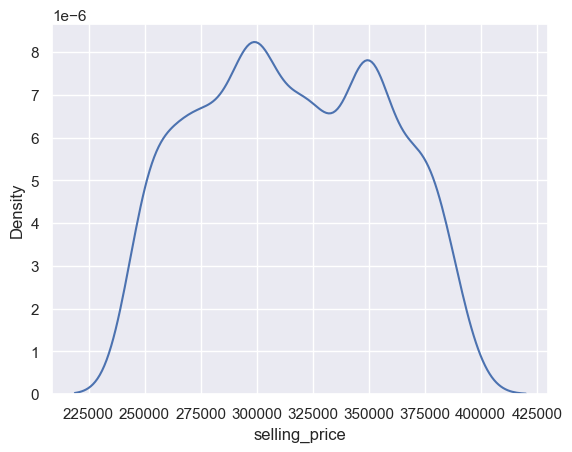

In [351]:
sns.kdeplot(df['selling_price'])

<Axes: xlabel='brand', ylabel='selling_price'>

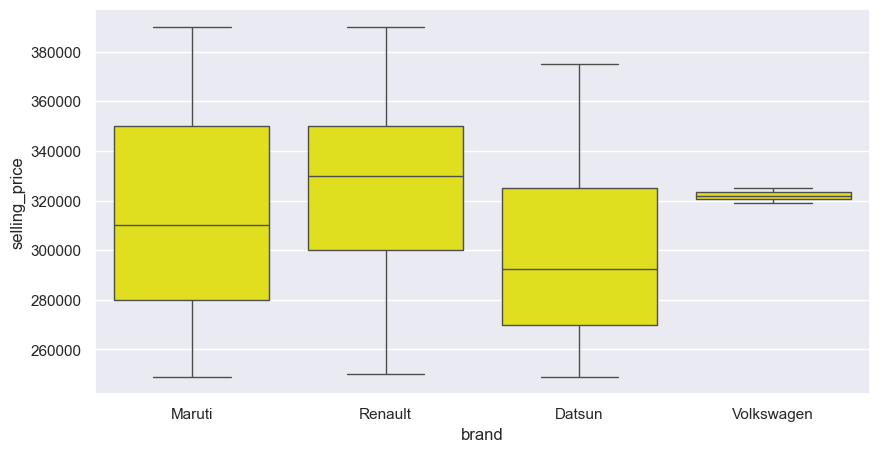

In [352]:
plt.figure(figsize=(10,5))
sns.set_theme(style ='darkgrid')
sns.boxplot(x ='brand', y='selling_price',data=df, color = 'yellow')

<Axes: xlabel='model', ylabel='selling_price'>

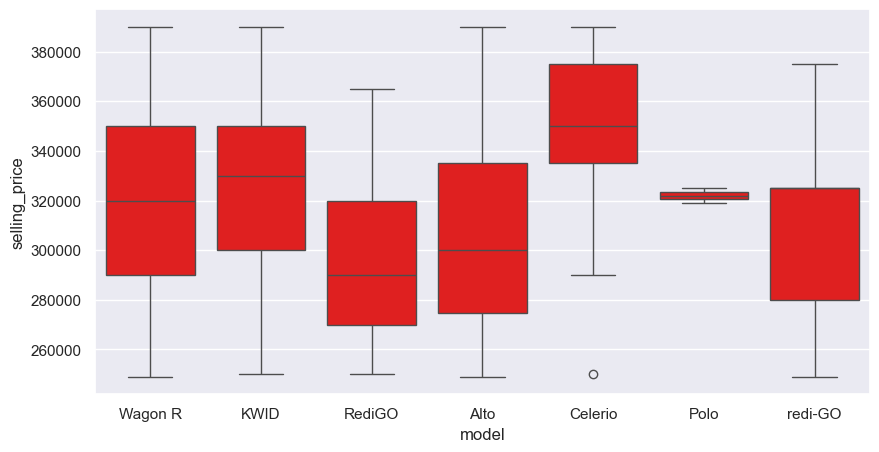

In [353]:
# detecting outliers on the selling price column against model

plt.figure(figsize=(10,5))
sns.set_theme(style ='darkgrid')
sns.boxplot(x ='model', y='selling_price',data=df, color = 'red')

<Axes: xlabel='car_name', ylabel='selling_price'>

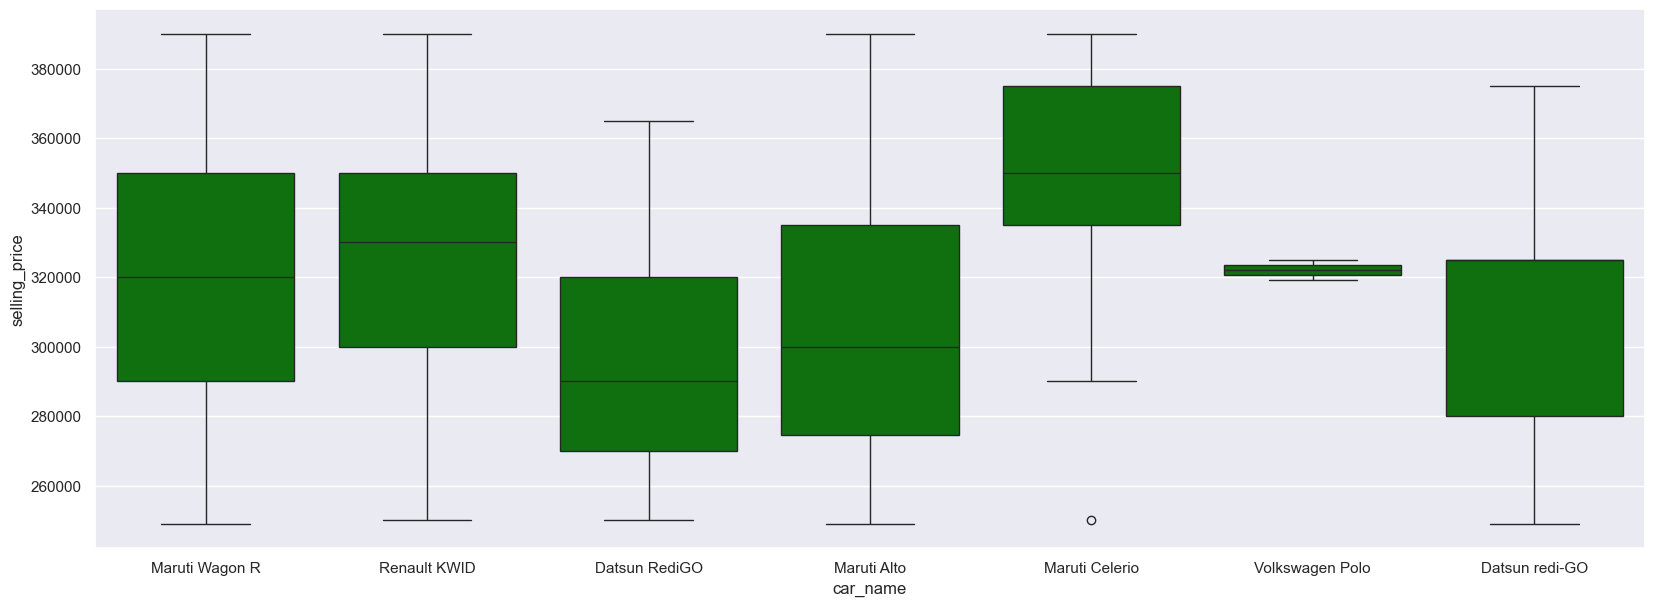

In [354]:
# detecting outliers on the selling price column

plt.figure(figsize=(20,7))
sns.set_theme(style ='darkgrid')
sns.boxplot(x ='car_name', y='selling_price',data=df, color = 'green')

<Axes: xlabel='selling_price', ylabel='Density'>

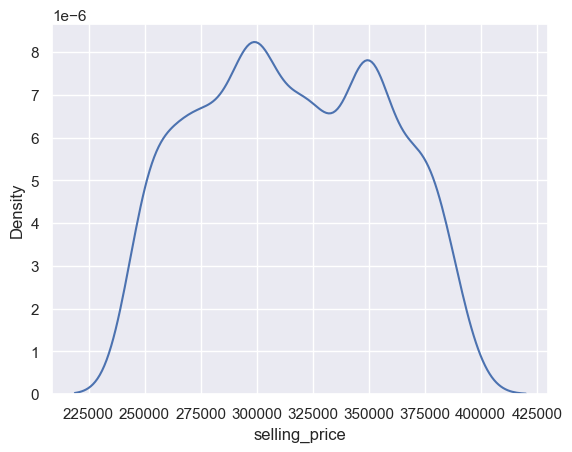

In [355]:
#detecting skewness
sns.kdeplot(df['selling_price'])

In [356]:
df_num = df.select_dtypes(include = ['int64','float64'])
df_num.skew( )

vehicle_age      0.499636
km_driven        0.989937
mileage          1.140498
max_power       -0.595742
seats           -7.761667
selling_price    0.029715
dtype: float64

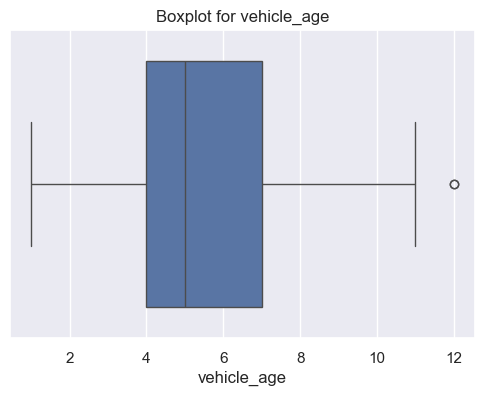

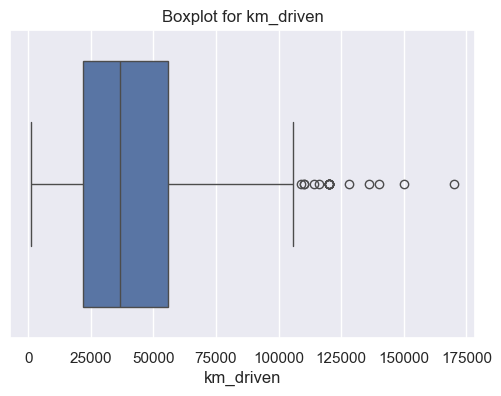

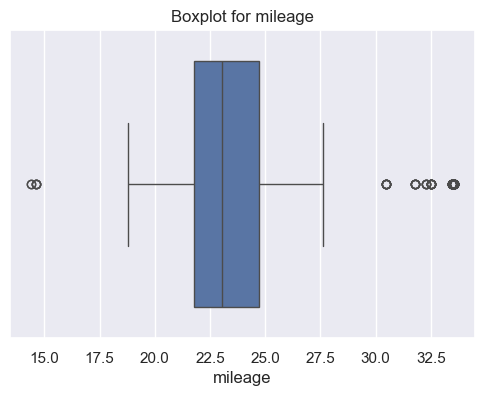

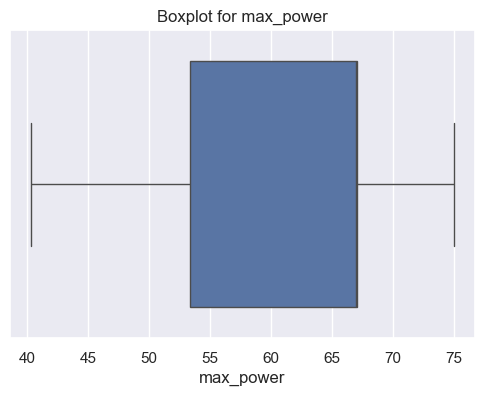

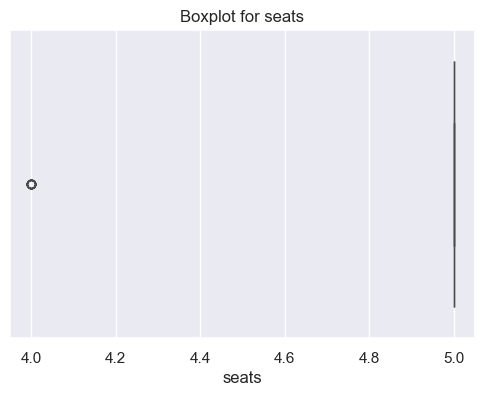

In [357]:
for feature in ['vehicle_age', 'km_driven', 'mileage', 'max_power', 'seats']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot for {feature}')

In [358]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] > lower_bound) & (df[column] < upper_bound)]

<Axes: xlabel='selling_price', ylabel='Density'>

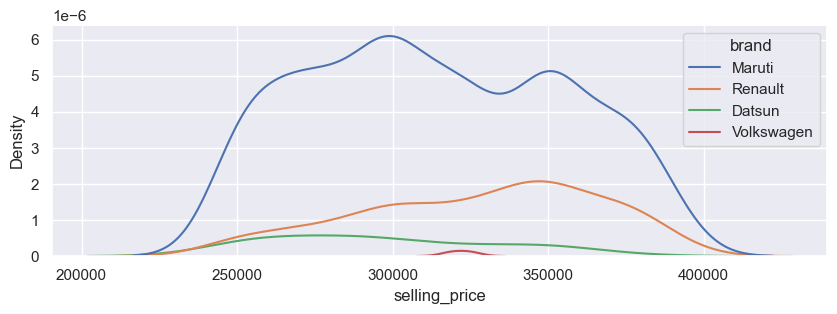

In [359]:
#kDe plot=displays after removal of outlier when hue is brand

plt.figure(figsize=(10,3))
sns.set_theme(style='darkgrid')
sns.kdeplot(x = df['selling_price'],hue=df['brand'])

In [360]:
for feature in ['vehicle_age', 'km_driven', 'mileage', 'max_power']:
    df = remove_outliers_iqr(df,feature)

<Axes: xlabel='selling_price', ylabel='Count'>

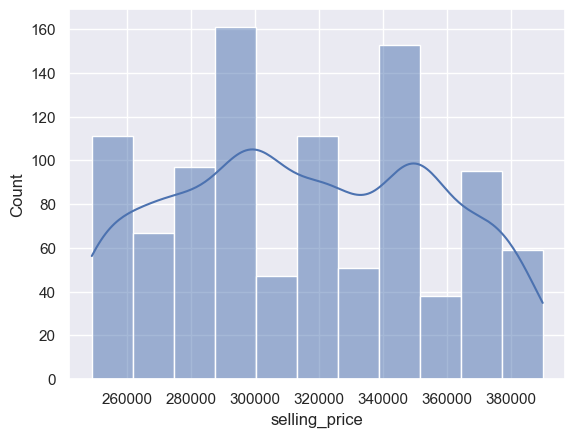

In [361]:
sns.histplot(df['selling_price'], kde = True)

<Axes: xlabel='selling_price', ylabel='Density'>

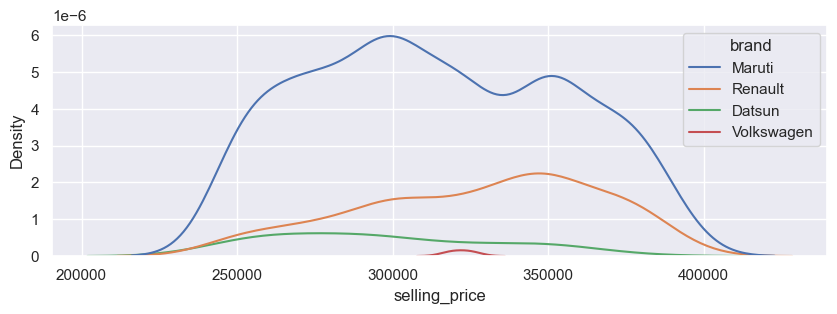

In [362]:
#kDe plot=displays after removal of outlier when hue is brand

plt.figure(figsize=(10,3))
sns.set_theme(style='darkgrid')
sns.kdeplot(x = df['selling_price'],hue=df['brand'])

In [363]:
df.describe()

,vehicle_age,km_driven,mileage,max_power,seats,selling_price
count,990.000000,990.000000,990.000000,990.000000,990.0,990.000000
mean,5.208081,38074.866667,22.922515,60.302859,5.0,316109.090909
std,2.079593,21445.675854,2.032040,8.367558,0.0,40297.506091
min,1.000000,1200.000000,18.780000,46.300000,5.0,249000.000000
25%,4.000000,20733.250000,21.790000,53.300000,5.0,284250.000000
50%,5.000000,35000.000000,23.010000,67.000000,5.0,315000.000000
75%,7.000000,51152.250000,24.700000,67.050000,5.0,350000.000000
max,11.000000,105610.000000,27.620000,75.000000,5.0,390000.000000


In [364]:
df_num = df.select_dtypes(include = ['int64','float64'])
df_num.skew( )

vehicle_age      0.489269
km_driven        0.533595
mileage         -0.376841
max_power       -0.563280
seats            0.000000
selling_price    0.024140
dtype: float64

In [365]:
#log tranformation
km =['km_driven']
df['km_log'] = np.log(df['km_driven'])

In [366]:
df_num.skew( )

vehicle_age      0.489269
km_driven        0.533595
mileage         -0.376841
max_power       -0.563280
seats            0.000000
selling_price    0.024140
dtype: float64

#Data Encoding:

In [367]:
df_cat = df.select_dtypes(include='object')
df_cat.head()

,car_name,brand,model
2,Maruti Wagon R,Maruti,Wagon R
6,Renault KWID,Renault,KWID
9,Datsun RediGO,Datsun,RediGO
11,Maruti Wagon R,Maruti,Wagon R
14,Renault KWID,Renault,KWID


In [368]:
# Choosen to use one hot since the categorial data is in no particular order. 

ohe = OneHotEncoder()
encode1 = ohe.fit_transform(df_cat)
encode1 # output= shows sparse matrix
df_ohe = pd.DataFrame(encode1.toarray(),columns=ohe.get_feature_names_out()) # used to create dataframe a lot of colomns - One hotlaber disadvantage
df_ohe.head()

,car_name_Datsun RediGO,car_name_Datsun redi-GO,car_name_Maruti Alto,car_name_Maruti Celerio,car_name_Maruti Wagon R,car_name_Renault KWID,car_name_Volkswagen Polo,brand_Datsun,brand_Maruti,brand_Renault,brand_Volkswagen,model_Alto,model_Celerio,model_KWID,model_Polo,model_RediGO,model_Wagon R,model_redi-GO
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [369]:
# drop colomn


ohe = OneHotEncoder(drop ="first")
encode1 = ohe.fit_transform(df_cat)
encode1 # output= shows sparse matrix
df_ohe = pd.DataFrame(encode1.toarray(),columns=ohe.get_feature_names_out()) # used to create dataframe a lot of colomns - One hotlaber disadvantage
df_ohe.head()

,car_name_Datsun redi-GO,car_name_Maruti Alto,car_name_Maruti Celerio,car_name_Maruti Wagon R,car_name_Renault KWID,car_name_Volkswagen Polo,brand_Maruti,brand_Renault,brand_Volkswagen,model_Celerio,model_KWID,model_Polo,model_RediGO,model_Wagon R,model_redi-GO
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [370]:
#Checking which categorical data has least number of colomn after 

df_cat.nunique().sort_values(ascending=False)

car_name    7
model       7
brand       4
dtype: int64

In [371]:
# Merging the encoded columns with original data frame

df = df.drop(columns=df_cat.columns) # dropping categorial columns from dataset
df_encoded = pd.concat([df.reset_index(drop=True), df_ohe.reset_index(drop=True)], axis=1) # linking encoded columns with dataset(df)
df_encoded.head() #outputs new dataframe

,vehicle_age,km_driven,mileage,max_power,seats,selling_price,km_log,car_name_Datsun redi-GO,car_name_Maruti Alto,car_name_Maruti Celerio,...,car_name_Volkswagen Polo,brand_Maruti,brand_Renault,brand_Volkswagen,model_Celerio,model_KWID,model_Polo,model_RediGO,model_Wagon R,model_redi-GO
0,8,35000,18.90,67.10,5,350000,10.463103,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4,30000,23.01,67.00,5,340000,10.308953,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,27263,22.50,68.00,5,350000,10.213286,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,7,37000,20.51,67.04,5,350000,10.518673,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3,22000,23.01,67.00,5,330000,9.998798,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [372]:
df_encoded.tail()

,vehicle_age,km_driven,mileage,max_power,seats,selling_price,km_log,car_name_Datsun redi-GO,car_name_Maruti Alto,car_name_Maruti Celerio,...,car_name_Volkswagen Polo,brand_Maruti,brand_Renault,brand_Volkswagen,model_Celerio,model_KWID,model_Polo,model_RediGO,model_Wagon R,model_redi-GO
985,7,68000,20.51,67.04,5,250000,11.127263,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
986,6,35000,25.17,53.30,5,265000,10.463103,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
987,6,21321,20.51,67.04,5,386000,9.967448,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
988,6,60000,23.10,67.04,5,385000,11.002100,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
989,4,12706,24.70,47.30,5,313000,9.449830,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#feature scaling

In [373]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled = ss.fit_transform(df_num)
scaled
df_scaled = pd.DataFrame(scaled,columns=df_num.columns)
df_scaled.head()

,vehicle_age,km_driven,mileage,max_power,seats,selling_price
0,1.343210,-0.143452,-1.980546,0.812731,0.0,0.841443
1,-0.581215,-0.376717,0.043074,0.800774,0.0,0.593163
2,-1.062322,-0.504406,-0.208032,0.920344,0.0,0.841443
3,0.862104,-0.050146,-1.187838,0.805557,0.0,0.841443
4,-1.062322,-0.749941,0.043074,0.800774,0.0,0.344883


In [374]:
df_scaled.describe()

,vehicle_age,km_driven,mileage,max_power,seats,selling_price
count,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,990.0,9.900000e+02
mean,-9.150929e-17,-8.612639e-17,1.052357e-15,1.421085e-15,0.0,6.746567e-16
std,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00,0.0,1.000505e+00
min,-2.024534e+00,-1.720324e+00,-2.039630e+00,-1.674316e+00,0.0,-1.666183e+00
25%,-5.812154e-01,-8.090387e-01,-5.576108e-01,-8.373289e-01,0.0,-7.909967e-01
50%,-1.001090e-01,-1.434518e-01,4.307448e-02,8.007744e-01,0.0,-2.753648e-02
75%,8.621037e-01,6.100994e-01,8.751713e-01,8.067529e-01,0.0,8.414426e-01
max,2.786529e+00,3.150718e+00,2.312877e+00,1.757331e+00,0.0,1.834562e+00


In [375]:
print(df_scaled.min())
print(df_scaled.max())

vehicle_age     -2.024534
km_driven       -1.720324
mileage         -2.039630
max_power       -1.674316
seats            0.000000
selling_price   -1.666183
dtype: float64
vehicle_age      2.786529
km_driven        3.150718
mileage          2.312877
max_power        1.757331
seats            0.000000
selling_price    1.834562
dtype: float64


In [376]:
# since there are min values below 0 and max values above 1:
#we need to import Minmaxscaler to covert them in a range of 0 to 1 
# which will assist coverting mean approximatley to zero and std approximately to 1


from sklearn.preprocessing import MinMaxScaler
mm= MinMaxScaler()
scaled = mm.fit_transform(df_num)
scaled
df_scaled = pd.DataFrame(scaled,columns=df_num.columns)
df_scaled.head()

,vehicle_age,km_driven,mileage,max_power,seats,selling_price
0,0.7,0.323724,0.013575,0.724739,0.0,0.716312
1,0.3,0.275836,0.478507,0.721254,0.0,0.645390
2,0.2,0.249622,0.420814,0.756098,0.0,0.716312
3,0.6,0.342879,0.195701,0.722648,0.0,0.716312
4,0.2,0.199215,0.478507,0.721254,0.0,0.574468


In [377]:
df_scaled.describe()

,vehicle_age,km_driven,mileage,max_power,seats,selling_price
count,990.000000,990.000000,990.000000,990.000000,990.0,990.000000
mean,0.420808,0.353174,0.468610,0.487904,0.0,0.475951
std,0.207959,0.205399,0.229869,0.291553,0.0,0.285798
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.300000,0.187082,0.340498,0.243902,0.0,0.250000
50%,0.400000,0.323724,0.478507,0.721254,0.0,0.468085
75%,0.600000,0.478424,0.669683,0.722997,0.0,0.716312
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [378]:
#checking for skewness after scaling

df_scaled.skew()

vehicle_age      0.489269
km_driven        0.533595
mileage         -0.376841
max_power       -0.563280
seats            0.000000
selling_price    0.024140
dtype: float64

<Axes: xlabel='selling_price', ylabel='Density'>

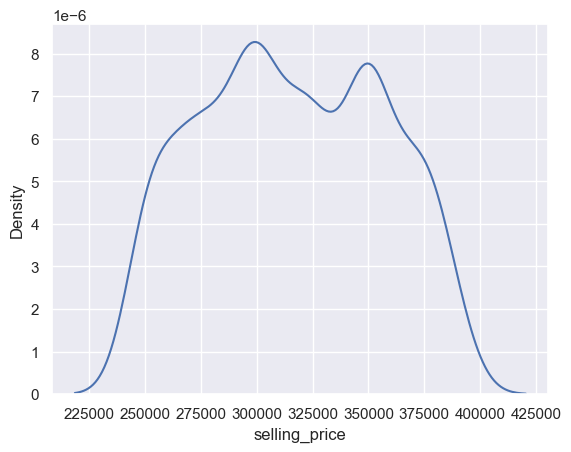

In [379]:
sns.kdeplot(df['selling_price'])

In [380]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

df['brand_new'] = df['vehicle_age'].apply(lambda x: 1 if x == 0 else 0)

df['selling_price'] = df['selling_price'].astype(str).str.replace(r'[^\d.]', '', regex=True)
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

df = df.dropna(subset=['selling_price'])

used_prices = df[df['brand_new'] == 0]['selling_price'].to_numpy(dtype=float)
new_prices = df[df['brand_new'] == 1]['selling_price'].to_numpy(dtype=float)

In [381]:
df['brand_new'] = df['vehicle_age'].apply(lambda x: 1 if x== 0 else 0)
df['brand_new'].value_counts()

brand_new
0    990
Name: count, dtype: int64

⚠ Skipping brand new cars KDE — not enough data or no variance.


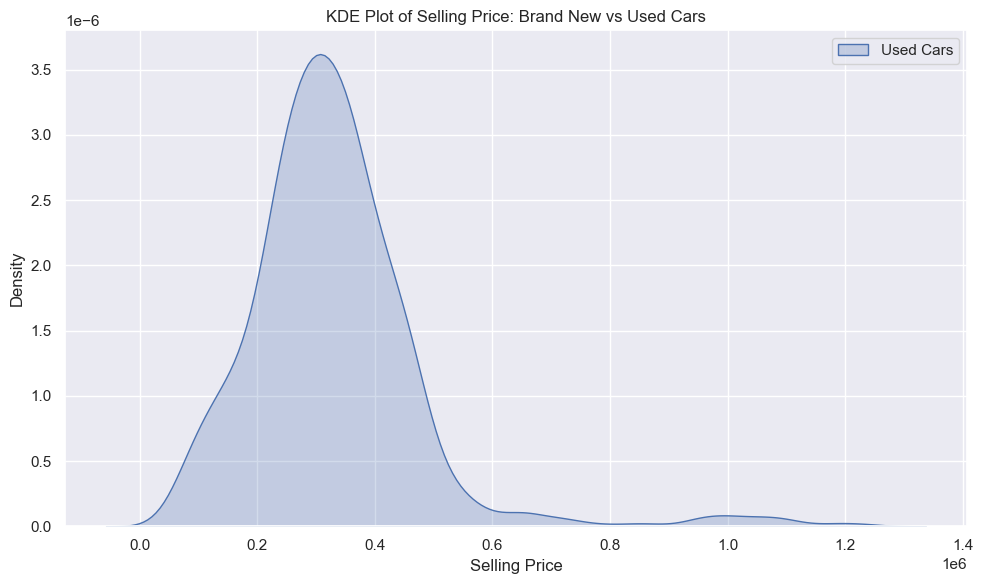

In [382]:
df = pd.read_csv("car_data_v2.csv")
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Add 'brand_new' column
df['brand_new'] = df['vehicle_age'].apply(lambda x: 1 if x == 0 else 0)

# Clean 'selling_price'
df['selling_price'] = df['selling_price'].astype(str).str.replace(r"[^\d.]", "", regex=True)
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')
df = df.dropna(subset=['selling_price'])

# Create cleaned NumPy arrays
used_prices = df[df['brand_new'] == 0]['selling_price'].dropna().astype(float).to_numpy()
new_prices = df[df['brand_new'] == 1]['selling_price'].dropna().astype(float).to_numpy()

# Remove any non-finite values
used_prices = used_prices[np.isfinite(used_prices)]
new_prices = new_prices[np.isfinite(new_prices)]
plt.figure(figsize=(10, 6))
sns.kdeplot(used_prices, label="Used Cars", fill=True)
if len(np.unique(new_prices)) > 1:  # Only plot if there's variance
    sns.kdeplot(new_prices, label="Brand New Cars", fill=True)
else:
    print("⚠ Skipping brand new cars KDE — not enough data or no variance.")
plt.title("KDE Plot of Selling Price: Brand New vs Used Cars")
plt.xlabel("Selling Price")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

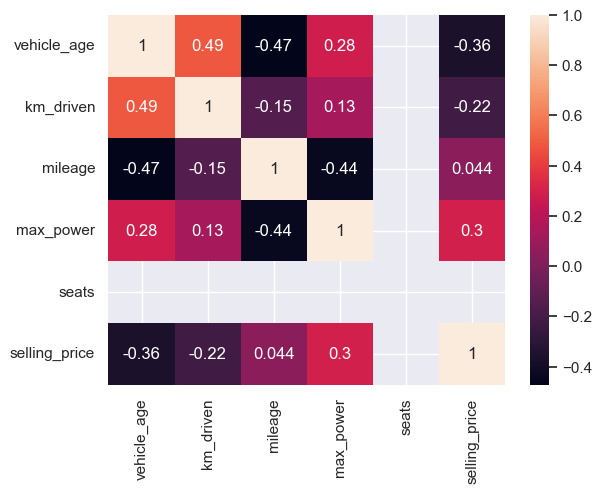

In [387]:
# heatmap= useed to visualised matrix

sns.heatmap(df_num.corr(),annot=True)

In [388]:
#There is a positive correlation between selling price & max power and selling price &mileage
#There is also a negative correlation between vihicle age  & selling price and selling price and km driven
# Thus all features have linear relation with Selling price

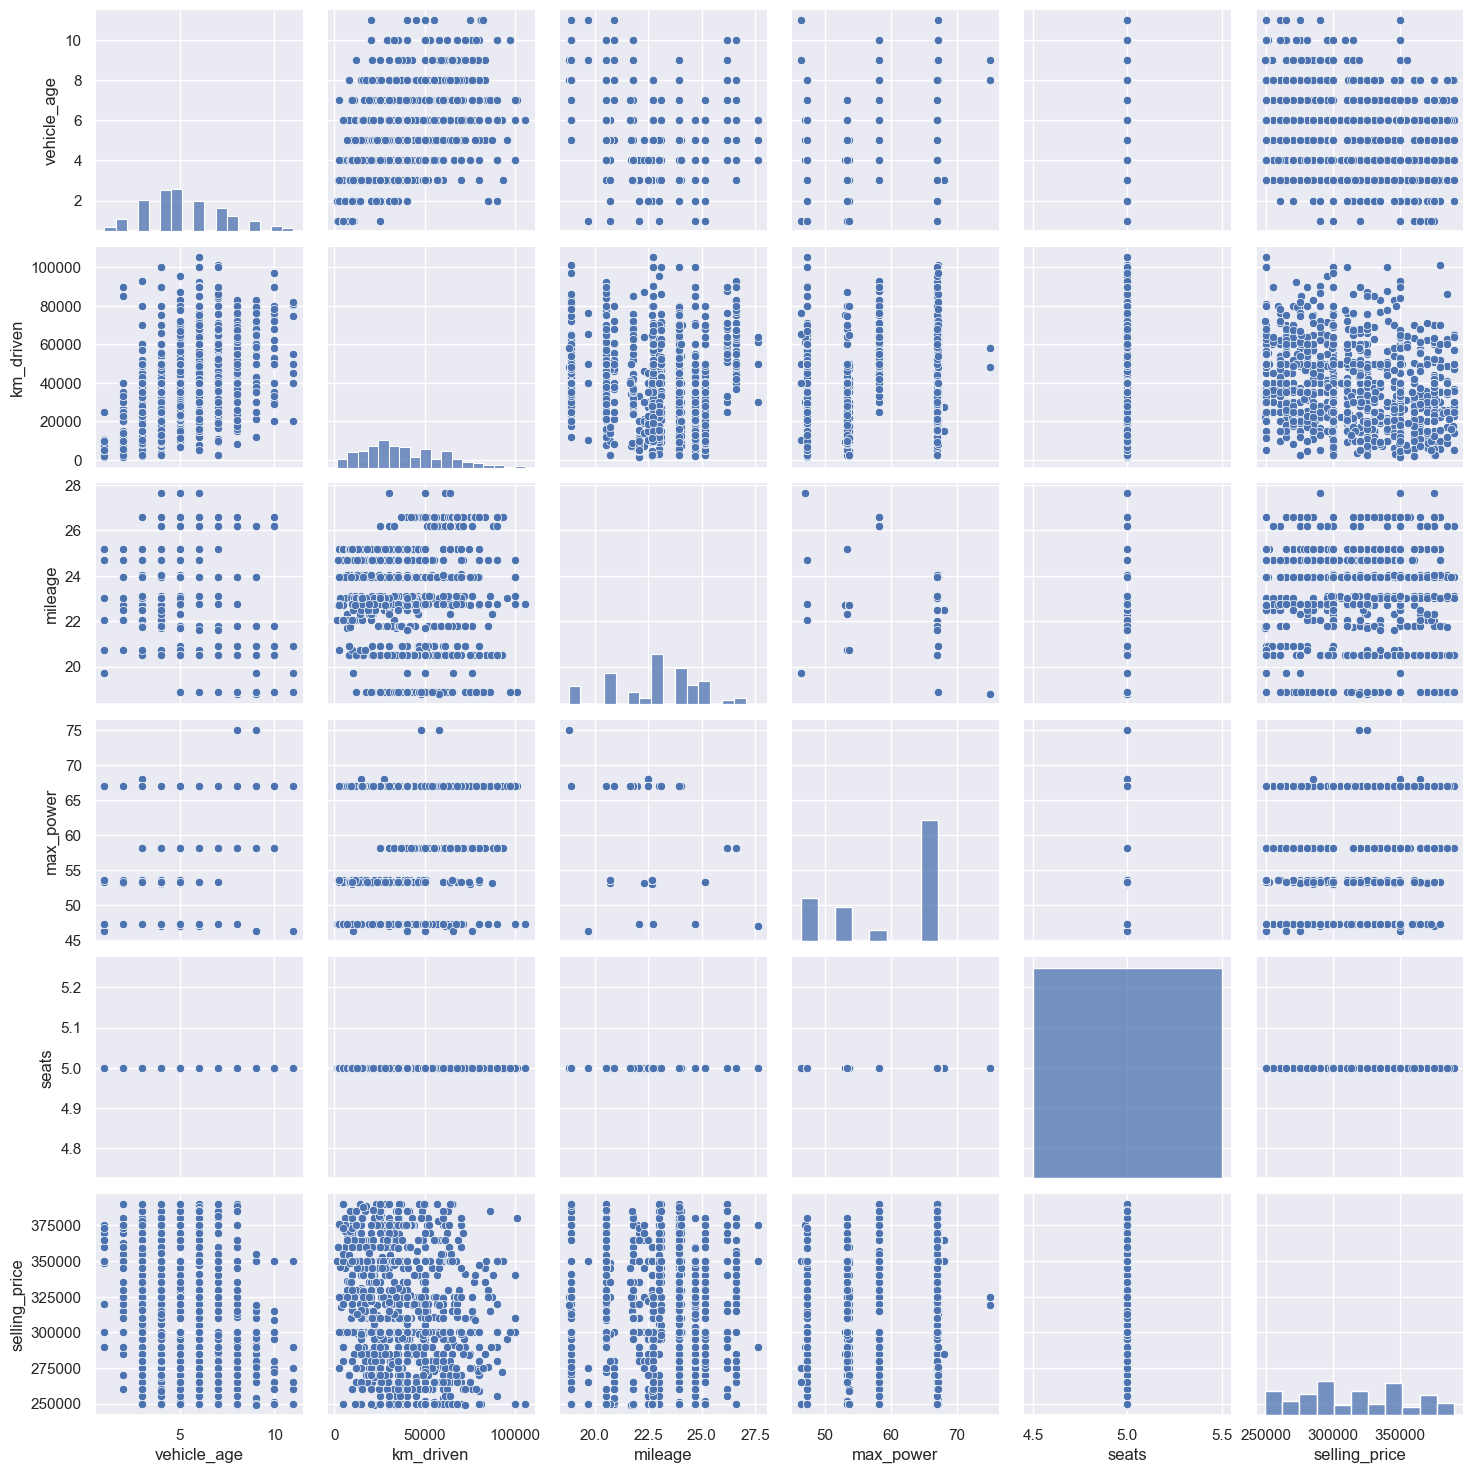

In [389]:
# pairplot - multivariate analysis
sns.pairplot(df_num)

In [390]:
# 1. Filter used cars only
df_used = df[df['brand_new'] == 0].copy()

# 2. Prepare features and target
X_used = df_used.drop(columns=['selling_price'])
y_used = df_used['selling_price']

# 3. Encode categorical columns
categorical_cols = X_used.select_dtypes(include='object').columns
for col in categorical_cols:
    X_used[col] = LabelEncoder().fit_transform(X_used[col].astype(str))

# 4. Fill any remaining missing values
X_used = X_used.fillna(0)

# 5. Scale the features
scaler = StandardScaler()
X_used_scaled = scaler.fit_transform(X_used)

# 6. Apply SelectKBest to select top 5 features
selector = SelectKBest(score_func=f_regression, k=5)
X_used_selected = selector.fit_transform(X_used_scaled, y_used)

# 7. Get names of selected features
selected_used_features = X_used.columns[selector.get_support()]
print("Top 5 Features for Used Cars:", selected_used_features.tolist())

Top 5 Features for Used Cars: ['model', 'vehicle_age', 'km_driven', 'max_power', 'seats']


In [391]:
df.to_csv("cleaned_car_data.csv", index=False)

In [396]:
df = pd.read_csv("cleaned_car_data.csv")

# Save it as Excel file
df.to_excel("cleaned_car_data.xlsx",index=False)